In [1]:
import os, sys
sys.path.append("/home/zhubenjin/codebase/det3d.pytorch")

import torch 

In [2]:
# %matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np 

In [3]:
from lib.visualization.show import visualize_feature_maps 

In [ ]:
import cv2 

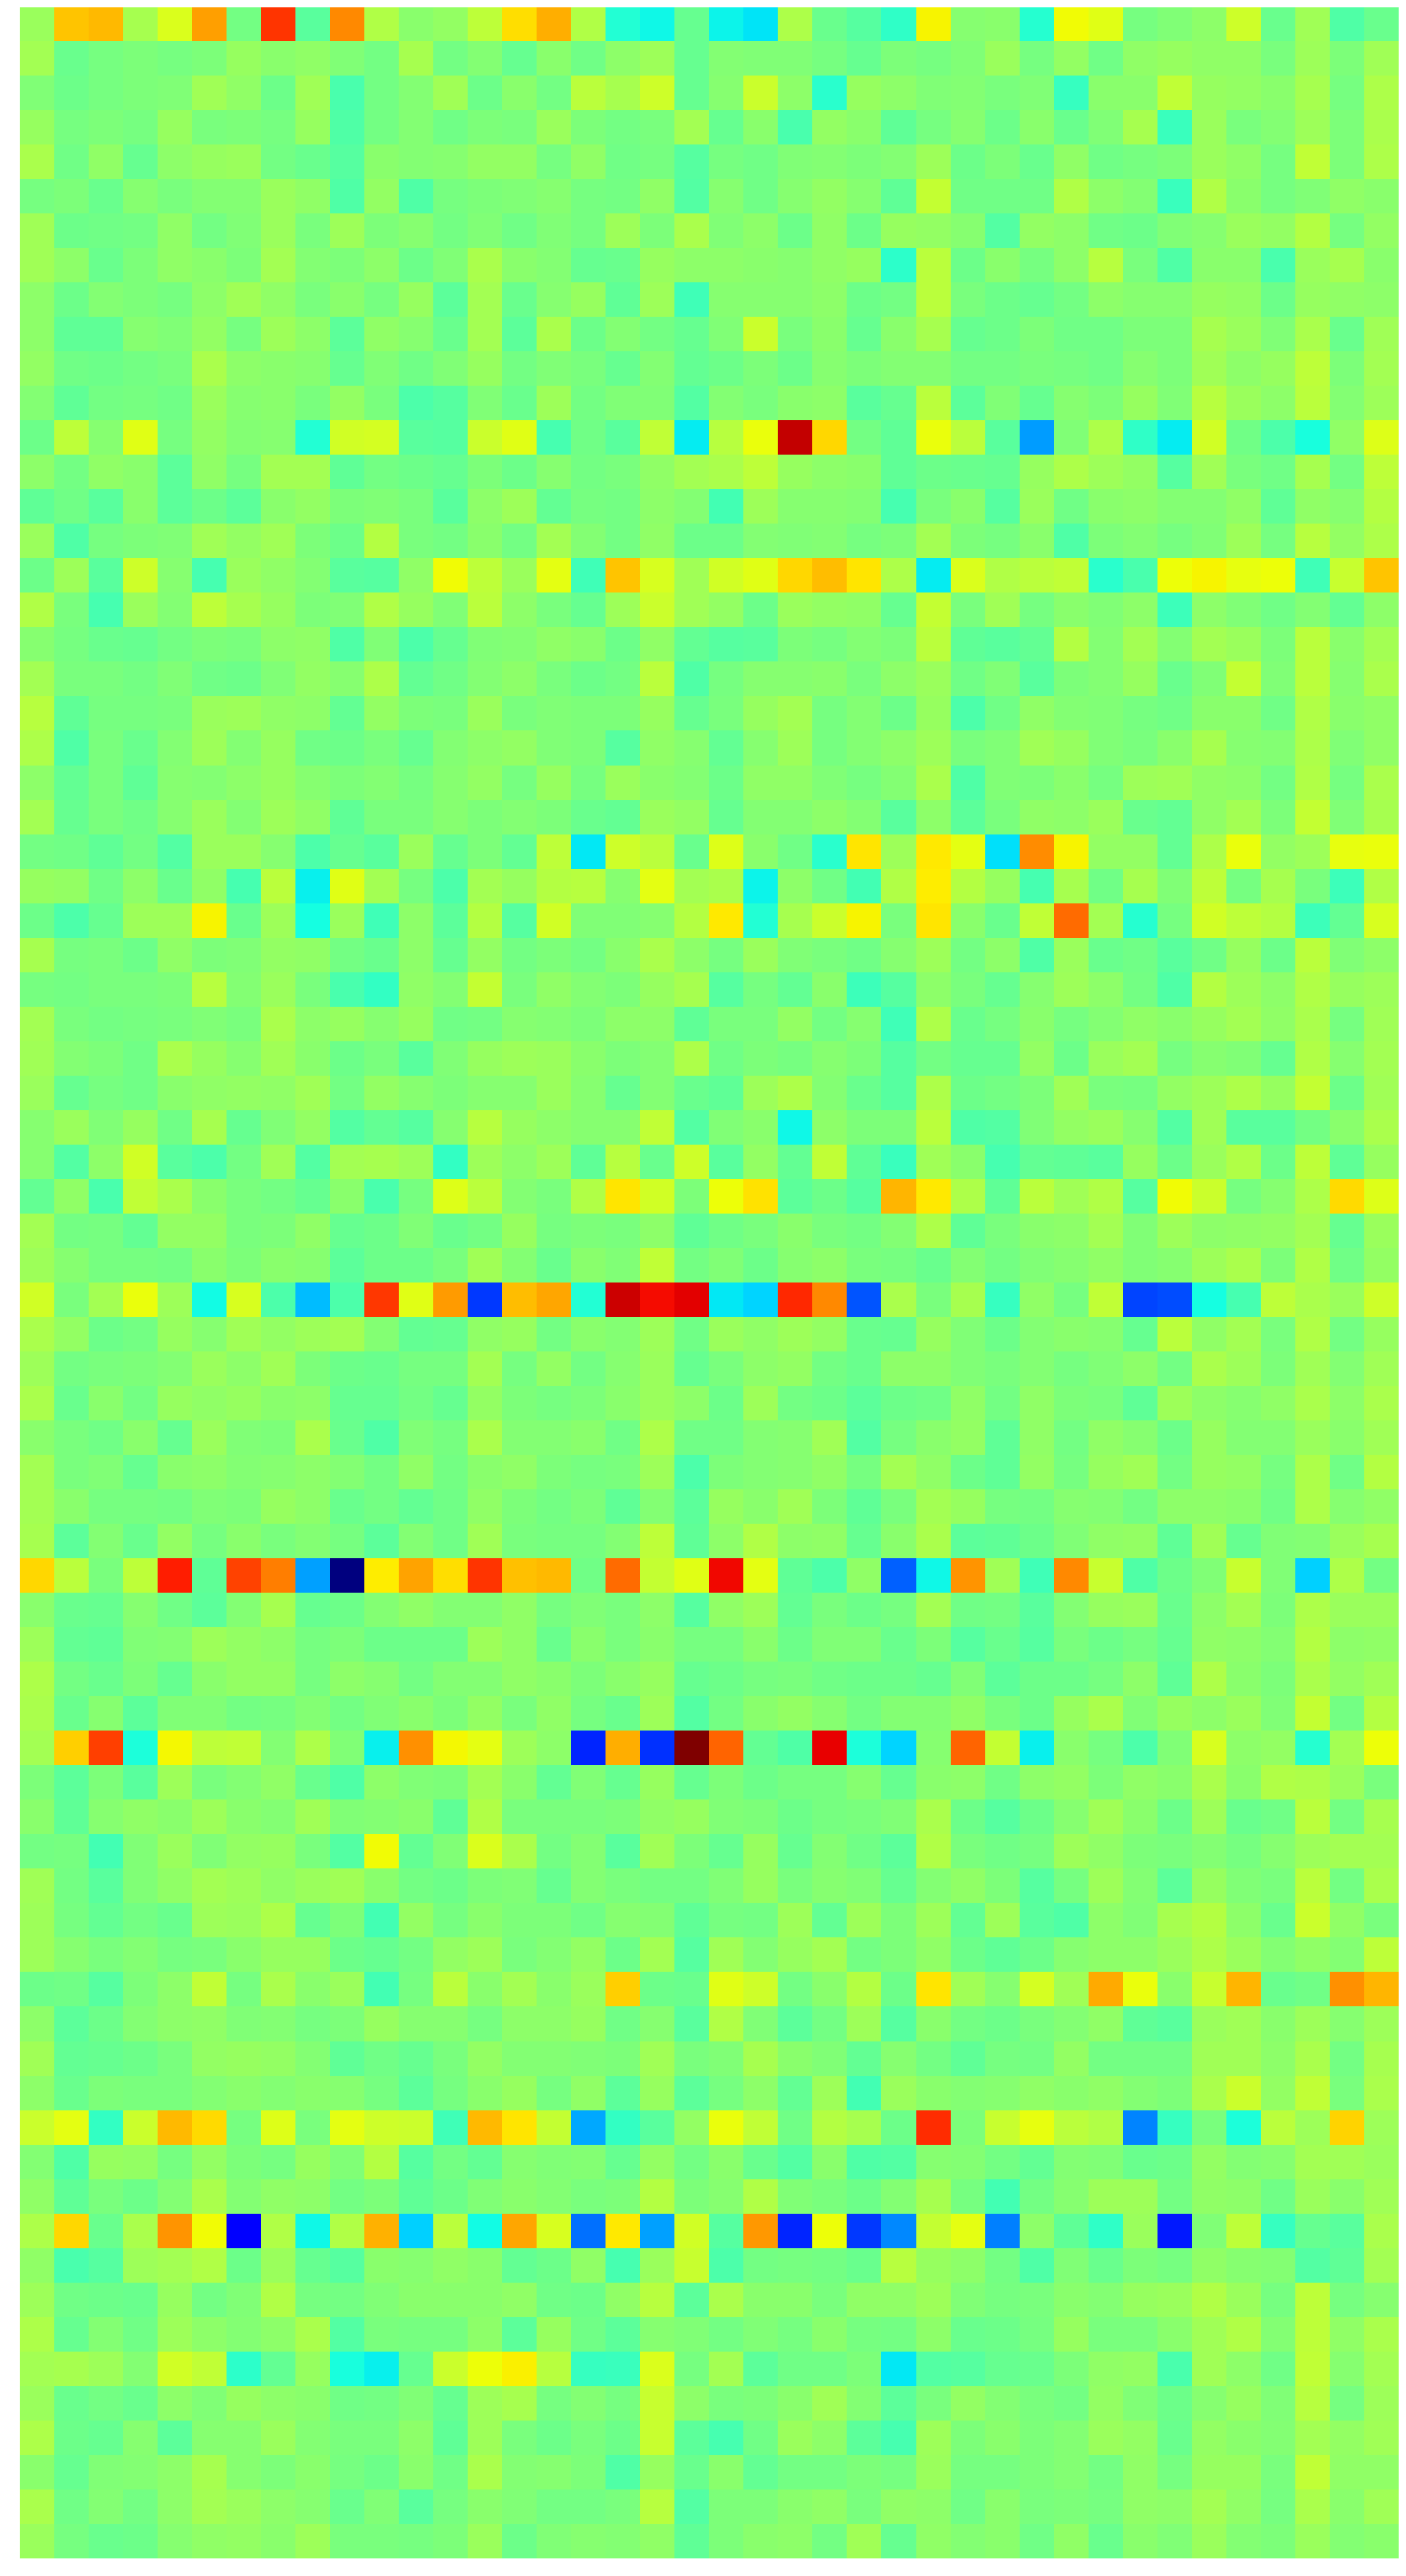

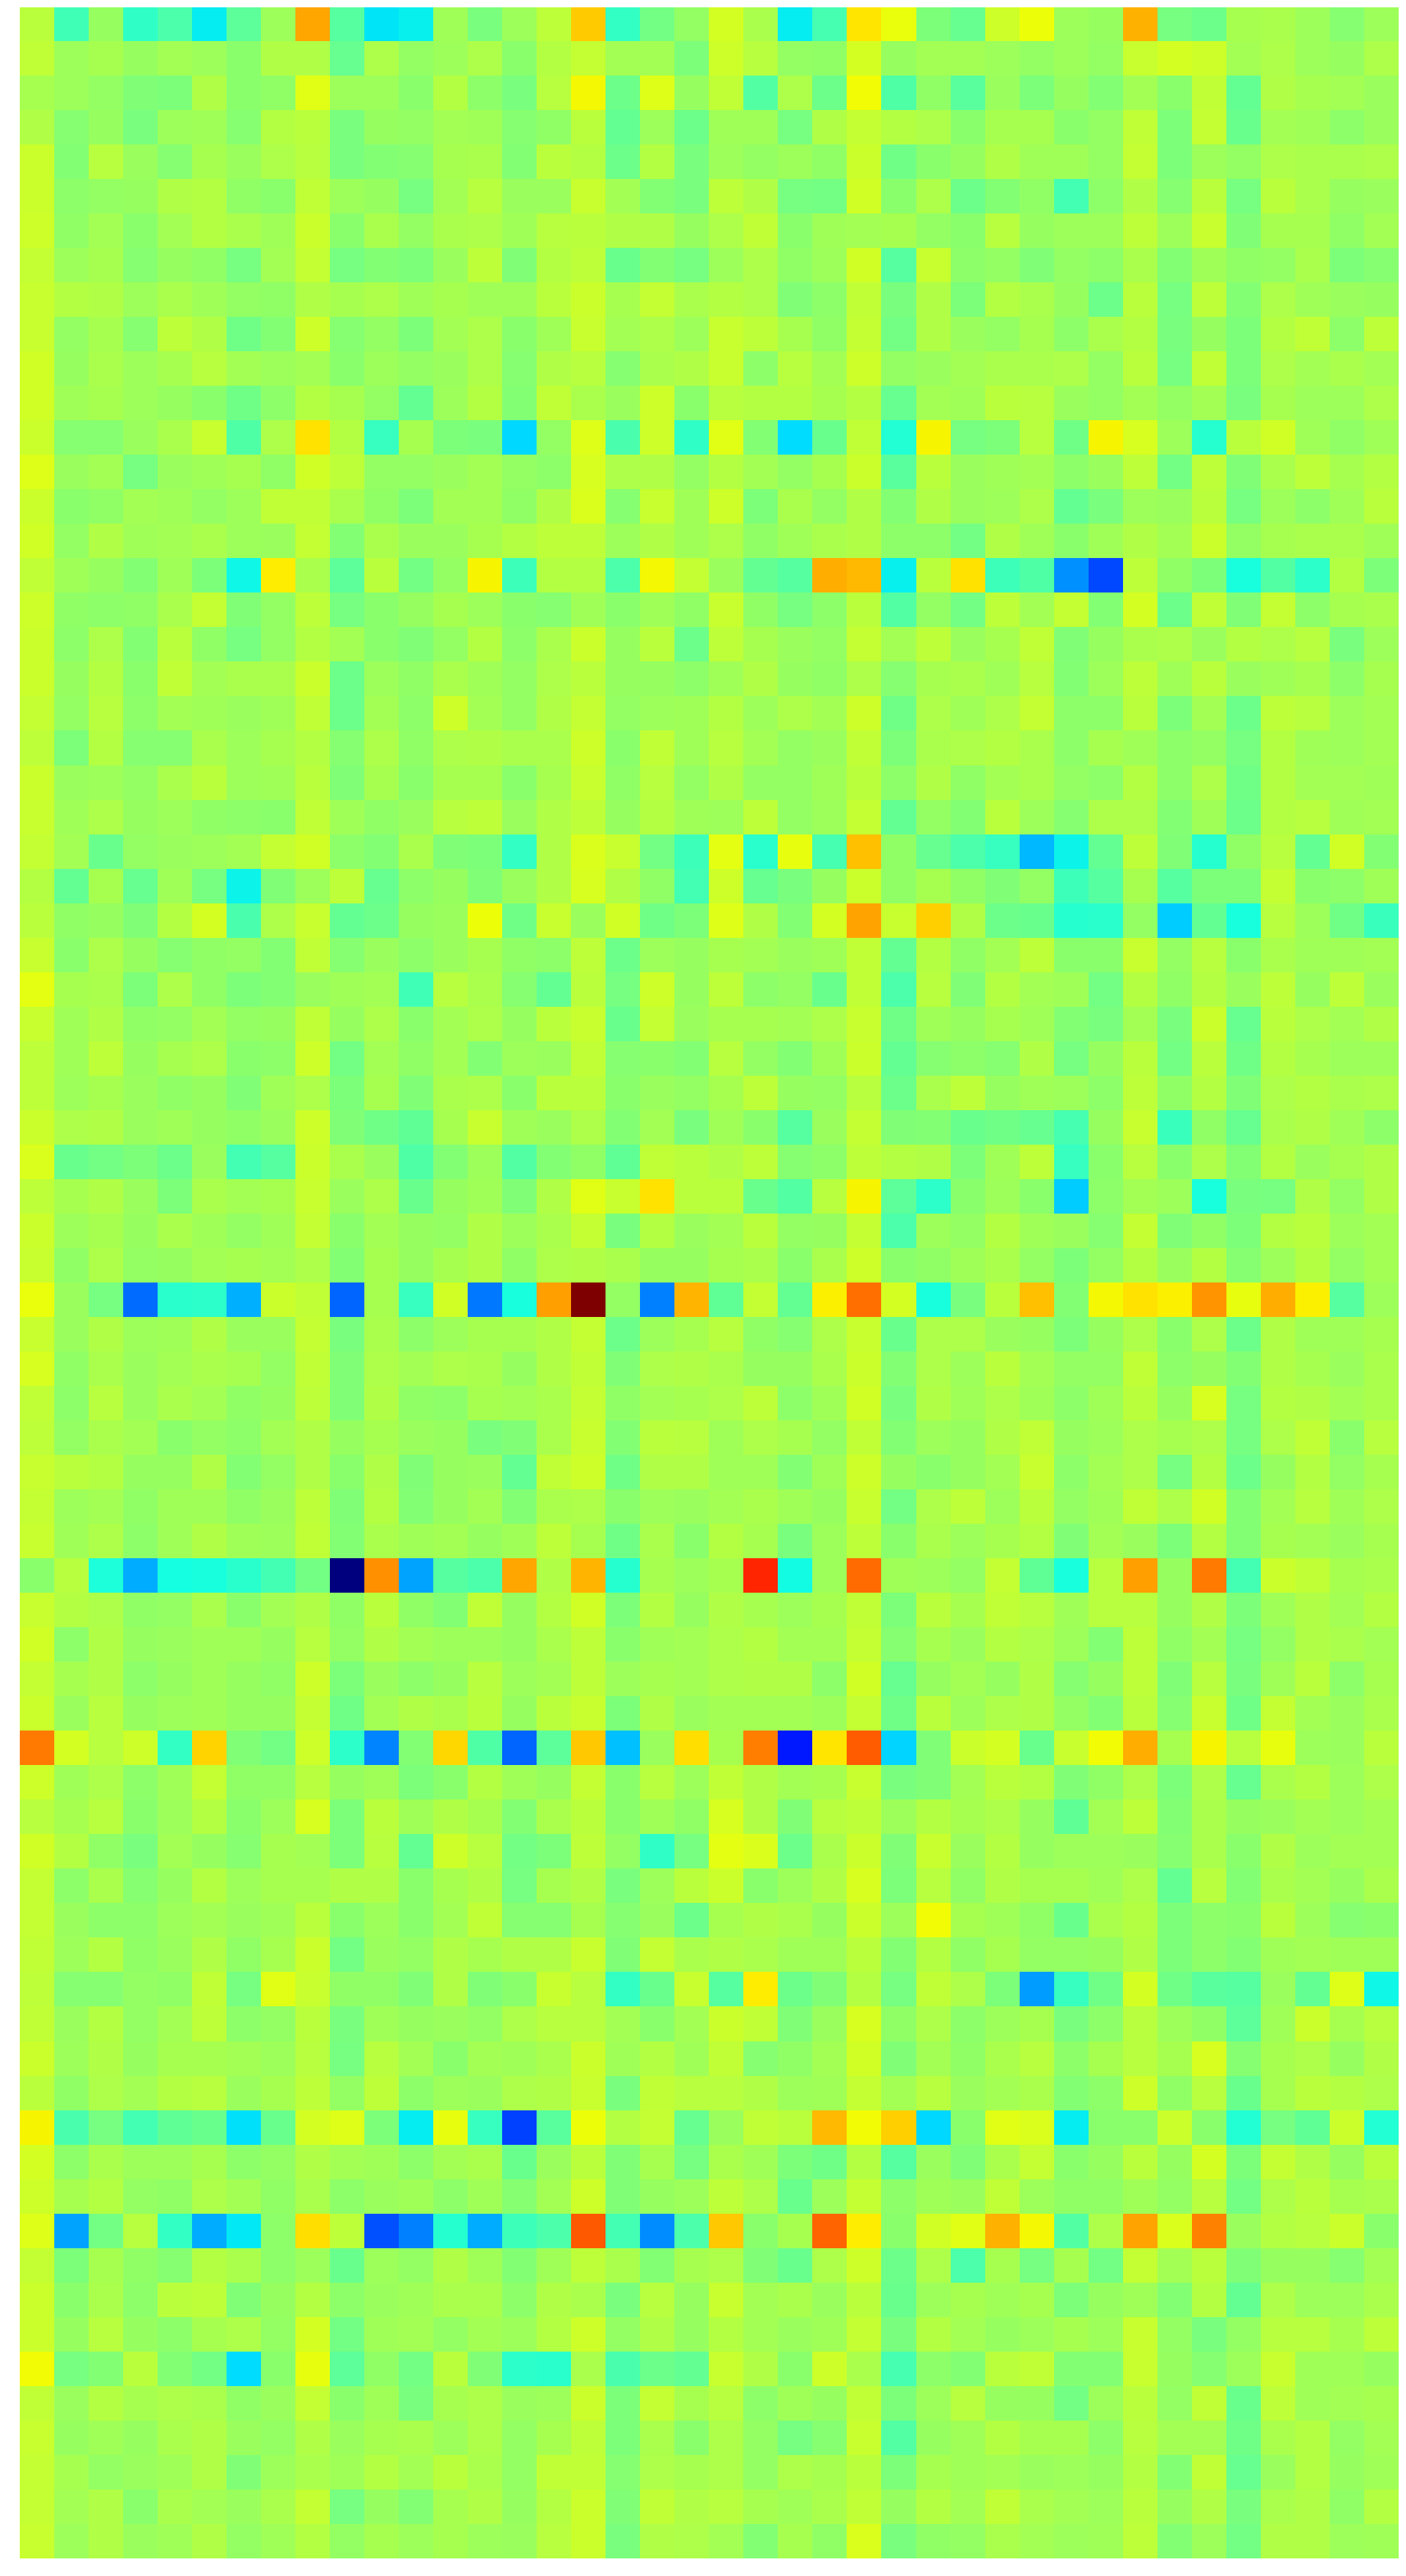

In [9]:
task_pred = np.fromfile("/home/zhubenjin/codebase/det3d.pytorch/task_pred.bin", dtype=np.float32).reshape(-1, 40, 2)
visualize_feature_maps(task_pred[:, :, 0:1]) 
visualize_feature_maps(task_pred[:, :, 1:2]) 

In [ ]:
task_pred_epoch_1 = np.fromfile("/home/zhubenjin/codebase/det3d.pytorch/test.bin", dtype=np.float32).reshape(-1, 40, 2)
visualize_feature_maps(task_pred_epoch_1[:, :, 0:1]) 
visualize_feature_maps(task_pred_epoch_1[:, :, 1:2]) 

In [23]:
# box = np.fromfile("/home/zhubenjin/codebase/det3d.pytorch/bev.bin", dtype=np.uint8).reshape(600, 640, 3)
box_canonical = np.fromfile("/home/zhubenjin/codebase/det3d.pytorch/bev_canonical_sidev.bin", dtype=np.uint8).reshape(600, 640, 3)
# visualize_feature_maps(box[:, :, 1:2]) 
visualize_feature_maps(box_canonical[:, :, 1:2]) 

ValueError: cannot reshape array of size 12000 into shape (600,640,3)

In [ ]:
task_pred_epoch_1 = np.fromfile("/home/zhubenjin/codebase/det3d.pytorch/task_pred_epoch_1_no_backward.bin", dtype=np.float32).reshape(-1, 40, 2)
visualize_feature_maps(task_pred_epoch_1[:, :, 0:1]) 
visualize_feature_maps(task_pred_epoch_1[:, :, 1:2])

In [ ]:
labels = np.fromfile("/home/zhubenjin/repos/det3d.velocity.pytorch/labels.bin", dtype=np.int32).reshape(500, 500, 4)

In [ ]:
bev = np.fromfile("/home/zhubenjin/repos/det3d.velocity.pytorch/bev.bin", dtype=np.float32).reshape(1000, 1000, 1)

In [ ]:
gt_boxes = np.fromfile("/home/zhubenjin/repos/det3d.velocity.pytorch/gt_boxes.bin", dtype='float64').reshape(-1, 9)

In [ ]:
labels_anchor0 = cv2.resize(labels[:, :, 0:1], (1000, 1000), interpolation=cv2.INTER_NEAREST)
labels_anchor1 = cv2.resize(labels[:, :, 1:2], (1000, 1000), interpolation=cv2.INTER_NEAREST)
if labels.shape[2] == 4:
    labels_anchor2 = cv2.resize(labels[:, :, 2:3], (1000, 1000), interpolation=cv2.INTER_NEAREST)
    labels_anchor3 = cv2.resize(labels[:, :, 3:4], (1000, 1000), interpolation=cv2.INTER_NEAREST)

In [ ]:
gt_boxes.shape

In [ ]:
from lib.core import box_np_ops

In [ ]:
# gt_boxes[:,6] = -1 * gt_boxes[:,6] - 0.5 * np.pi
gts = box_np_ops.rbbox3d_to_corners(gt_boxes[:, [0,1,2,3,4,5,8]])

In [ ]:
gts = (gts//0.1 + bev.shape[0] * 0.5).astype(np.int32).transpose(0,2,1)

In [ ]:
gts.shape

In [ ]:
visualize_feature_maps(bev, anno=gts, axes=[0,1]) 

In [ ]:
visualize_feature_maps(labels_anchor0[:, :, np.newaxis]+bev, anno=gts, axes=[0,1]) 

In [ ]:
visualize_feature_maps(labels_anchor1[:, :, np.newaxis]+bev, anno=gts, axes=[0,1]) 

In [ ]:
visualize_feature_maps(labels_anchor2[:, :, np.newaxis]+bev, anno=gts, axes=[0,1]) 

In [ ]:
visualize_feature_maps(labels_anchor3[:, :, np.newaxis]+bev, anno=gts, axes=[0,1]) 